In [29]:
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos del IPC

Los datos del IPC están en español, por lo que es necesario especificar un **encoding** adecuado que permita interpretar correctamente caracteres especiales como la "Ñ" y los acentos.

Además, el archivo proporcionado por el INE utiliza `;` como separador, por lo que es importante indicarlo al momento de la lectura.


In [30]:
df_ipc_2023 = pd.read_csv("data/ipc_base_20237baa955a44fe4eada201c196338fb3be.csv",encoding="latin1", on_bad_lines='skip',sep=";",decimal=",") # Lectura
df_ipc_2018 = pd.read_csv("data/ipc-csv.csv",encoding="latin1",on_bad_lines='skip',sep=";",decimal=",") # Lectura

try:
    if df_ipc_2018.columns.equals(df_ipc_2023.columns):
        """
        Se realiza la comparación para asegurarse que no hayan diferencias en las columnas
        """
        df_ipc = pd.concat([df_ipc_2018,df_ipc_2023],ignore_index=True,verify_integrity=True) # Realizamos la unión de los datos crudos y revisamos que no /
        # hayan datos duplicados con verify_integrity
        if df_ipc[df_ipc["Glosa"] == "IPC General"]["Año"].value_counts().max() > 12:
            raise("Hay datos duplicados")
            df_ipc = None
        else:
            df_ipc.rename(columns={"Índice" : "IPC-NB"},inplace=True)
            print("Datos correctamente concatenados")

    else:
        print("Hay incongruencias en las columnas")
except:
    print("Error")


Datos correctamente concatenados


In [31]:
df_ipc

,Año,Mes,División,Grupo,Clase,Subclase,Producto,Glosa,Ponderación,IPC-NB,Variación Mensual (%),Variación Acumulada (%),Variación 12 Meses (%),Incidencia Mensual (%),Incidencia Acumulada (%),Incidencia 12 Meses (%)
0,2019,1,NaN,NaN,NaN,NaN,NaN,IPC General,NaN,100.75,0.1,0.1,NaN,NaN,NaN,NaN
1,2019,1,1.0,NaN,NaN,NaN,NaN,ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS,19.30131,100.50,-0.3,-0.3,NaN,-0.051,-0.051,NaN
2,2019,1,1.0,1.0,NaN,NaN,NaN,ALIMENTOS,17.13731,100.32,-0.3,-0.3,NaN,-0.045,-0.045,NaN
3,2019,1,1.0,1.0,1.0,NaN,NaN,PAN Y CEREALES,4.03457,101.58,0.3,0.3,NaN,0.011,0.011,NaN
4,2019,1,1.0,1.0,1.0,1.0,NaN,ARROZ,0.18033,98.62,-1.1,-1.1,NaN,-0.002,-0.002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45293,2025,5,13.0,4.0,1.0,NaN,NaN,OTROS SERVICIOS,0.51757,115.22,0.6,2.0,7.2,0.003,0.011,0.039
45294,2025,5,13.0,4.0,1.0,1.0,NaN,OTROS SERVICIOS,0.51757,115.22,0.6,2.0,7.2,0.003,0.011,0.039
45295,2025,5,13.0,4.0,1.0,1.0,1.0,SERVICIOS FUNERARIOS,0.40123,116.07,0.5,1.6,8.1,0.002,0.007,0.034
45296,2025,5,13.0,4.0,1.0,1.0,2.0,EMISIÓN DE CERTIFICADOS,0.07767,114.26,1.2,4.4,5.0,0.001,0.004,0.004


## Filtro de columnas relevantes

En esta etapa se descartan las columnas relacionadas con las variaciones, ya que no serán utilizadas por el momento. Se conservarán únicamente las columnas correspondientes al **año**, **mes** y el **valor del IPC general**, que serán las variables de interés para el análisis.


In [32]:
df_ipc = df_ipc[df_ipc["Glosa"] == "IPC General"][["Año","Mes","Glosa","IPC-NB"]].astype({
    "Año" : str, # Se convierte los valores String
    "Mes": str, #Se convierte los valores String
    "IPC-NB" : float # # Se convierte los valores String a Float
})
df_ipc["Año-Mes"] = df_ipc["Año"] + "-" + df_ipc["Mes"] # Se unen las columnas Año y Mes
df_ipc["Año-Mes"] = pd.to_datetime(df_ipc["Año-Mes"]) # Se convierten en Datetime
df_ipc.index = df_ipc["Año-Mes"] # Se traspasan a DateIndex
df_ipc.drop(["Año","Mes","Año-Mes"],axis=1,inplace=True) # Se borran las columnas redundantes


## Visualización preliminar

En el gráfico se observa claramente el **rebalanceo aplicado en enero de 2024**, el cual provoca una caída abrupta en los valores del IPC debido al reinicio del índice con una nueva base (100). Esta discontinuidad no representa una disminución real en los precios, sino un cambio metodológico en la serie temporal.


<Axes: xlabel='Año-Mes'>

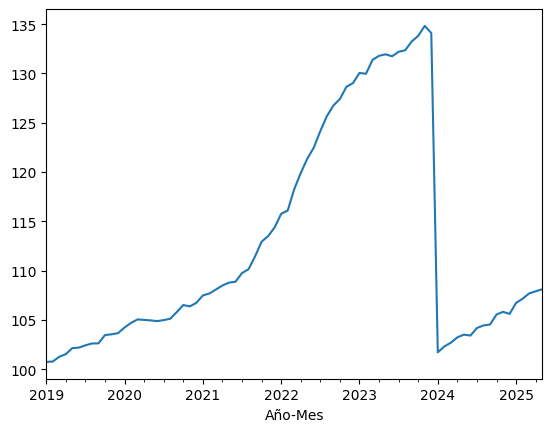

In [38]:
df_ipc["IPC-NB"].plot()

## Ajuste del rebalanceo en la serie

Existen diversos métodos para tratar las discontinuidades provocadas por un rebalanceo en una serie temporal, como la diferenciación de primer o segundo orden. Sin embargo, dado que este cambio no representa una variación real en los precios, sino un reajuste metodológico, se opta por **ajustar los valores posteriores al rebalanceo** para mantener la coherencia con la base anterior y así preservar la continuidad de la serie.


In [39]:
# df_ipc: contiene columna "fecha" y "ipc"
# Detectar rebalanceo
valor_pre_rebalanceo = df_ipc[df_ipc.index == "2023-12-01"]["IPC-NB"].values[0]
valor_post_rebalanceo = df_ipc[df_ipc.index == "2024-01-01"]["IPC-NB"].values[0]

diferencia_base = valor_post_rebalanceo - 100

# Ajustar los valores desde 2024 en adelante
df_ipc["ipc_ajustado"] = df_ipc["IPC-NB"]

# Aplicar el ajuste solo a fechas posteriores a 2023-12
df_ipc.loc[df_ipc.index >= "2024-01-01", "ipc_ajustado"] = \
    valor_pre_rebalanceo + (df_ipc.loc[df_ipc.index >= "2024-01-01", "IPC-NB"] - 100)



### Coeficiente de variación en las diferencias mensuales

Al calcular el coeficiente de variación (CV) sobre las diferencias mensuales del IPC ajustado, se obtiene un valor cercano a 1. Esto sugiere que la dispersión de los cambios mensuales es tan alta como su promedio, lo cual es característico de procesos con alta aleatoriedad o volatilidad, como un comportamiento tipo "ruido blanco".


El valor del coeficiente de variación es : 1.0023566831851238


<Axes: xlabel='Año-Mes'>

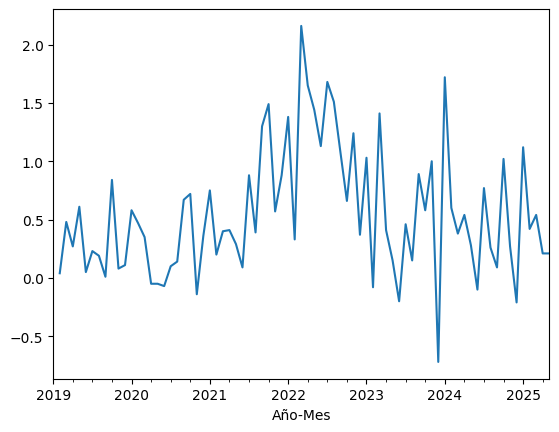

In [52]:
print(f"El valor del coeficiente de variación es : {df_ipc["ipc_ajustado"].diff().std() / df_ipc["ipc_ajustado"].diff().mean()}")
df_ipc["ipc_ajustado"].diff().plot()


## Descomposición Estacional

Al descomponer la serie temporal del IPC ajustado, se identificaron tres componentes clave:

- **Tendencia**: refleja un crecimiento sostenido a lo largo del tiempo, interrumpido ligeramente por el rebalanceo del año 2023.
- **Estacionalidad**: se observa un comportamiento cíclico regular, con repeticiones aproximadamente cada 12 meses, lo que sugiere una fuerte influencia de factores estacionales.
- **Residuos**: no presentan patrones sistemáticos, lo cual sugiere un buen ajuste de los componentes anteriores.


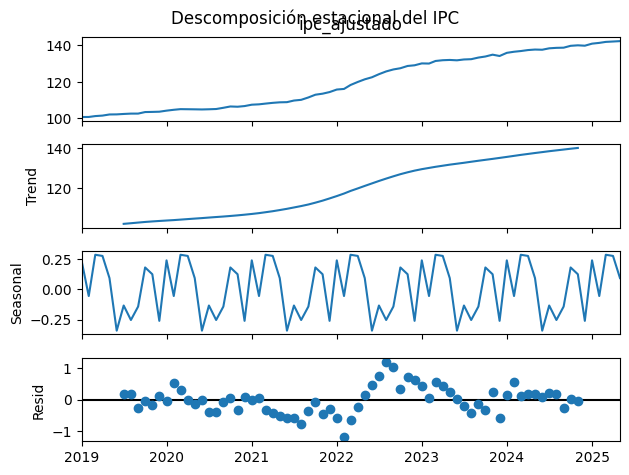

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

ipc_series = df_ipc["ipc_ajustado"].asfreq("MS")
result = seasonal_decompose(ipc_series, model="additive")

result.plot()
plt.suptitle("Descomposición estacional del IPC")
plt.show()

## Análisis de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)

Como parte del análisis exploratorio, se examinan las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) del IPC ajustado para identificar posibles estructuras internas en la serie temporal.

- **ACF (Autocorrelación):** Permite visualizar el grado de dependencia entre los valores actuales y pasados del IPC a distintos rezagos. Un decaimiento progresivo sugiere persistencia o tendencia en la serie.
- **PACF (Autocorrelación Parcial):** Mide la relación entre una observación y sus rezagos eliminando los efectos intermedios. Un corte abrupto en el rezago 2 puede indicar que la mayor parte de la dependencia se explica con dos rezagos.



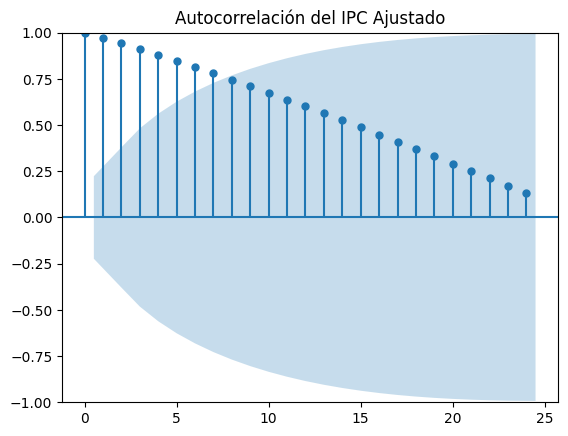

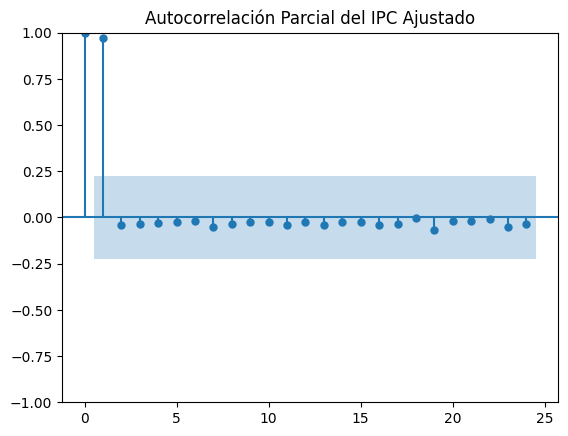

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_ipc['ipc_ajustado'].dropna(), lags=24)
plt.title("Autocorrelación del IPC Ajustado")
plt.show()

plot_pacf(df_ipc['ipc_ajustado'].dropna(), lags=24)
plt.title("Autocorrelación Parcial del IPC Ajustado")
plt.show()

In [74]:
## Analisis AutoRegresión

In [67]:
from statsmodels.tsa.ar_model import AutoReg

modelo = AutoReg(df_ipc['ipc_ajustado'], lags=2)
resultado = modelo.fit()
print(resultado.summary())

                            AutoReg Model Results                             
Dep. Variable:           ipc_ajustado   No. Observations:                   77
Model:                     AutoReg(2)   Log Likelihood                 -59.187
Method:               Conditional MLE   S.D. of innovations              0.533
Date:                Tue, 01 Jul 2025   AIC                            126.374
Time:                        15:04:14   BIC                            135.644
Sample:                    03-01-2019   HQIC                           130.076
                         - 05-01-2025                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2436      0.523      0.466      0.641      -0.781       1.268
ipc_ajustado.L1     1.1907      0.113     10.506      0.000       0.969       1.413
ipc_ajustado.L2    -0.1890      

c:\Users\USUARIO\Desktop\Proyectos Javier\IPC-vs-Crude-oil\IPC-Oil\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Visualización estacional

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18812\3296924431.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_mensual = df_ipc.groupby('Mes_nombre')['ipc_ajustado'].mean().reset_index()


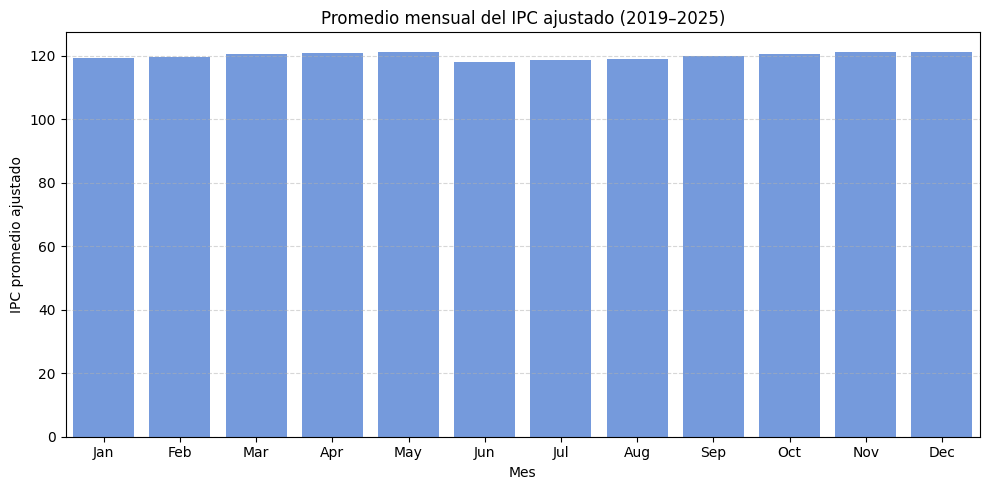

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer mes con nombre abreviado (Ene, Feb, ...)
df_ipc['Mes_nombre'] = df_ipc.index.strftime('%b')

# Orden correcto de los meses
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_ipc['Mes_nombre'] = pd.Categorical(df_ipc['Mes_nombre'], categories=orden_meses, ordered=True)

# Calcular media mensual
media_mensual = df_ipc.groupby('Mes_nombre')['ipc_ajustado'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=media_mensual, x='Mes_nombre', y='ipc_ajustado', color='cornflowerblue')
plt.title('Promedio mensual del IPC ajustado (2019–2025)')
plt.ylabel('IPC promedio ajustado')
plt.xlabel('Mes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18812\1146275893.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variacion_media = df_ipc.groupby('Mes_nombre')['variacion_mensual'].mean().reset_index()


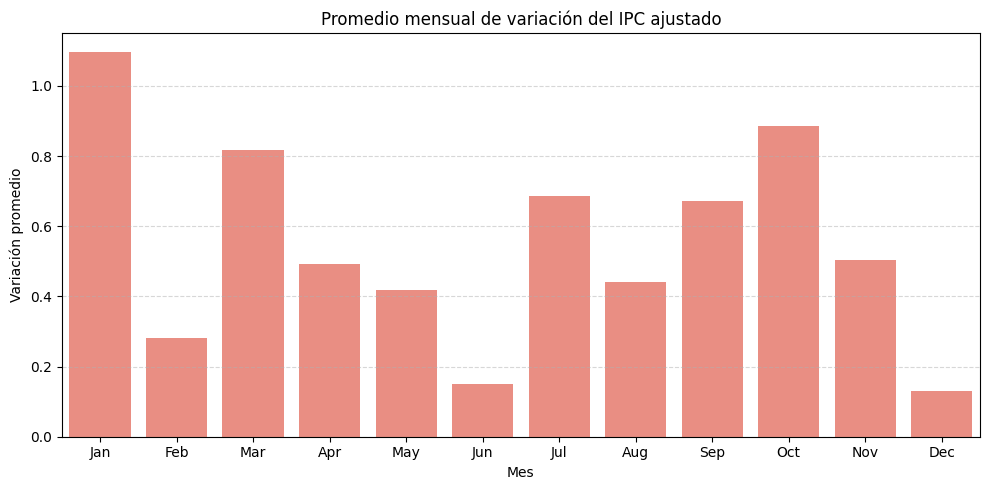

In [73]:
# Crear columna con la variación mensual
df_ipc['variacion_mensual'] = df_ipc['ipc_ajustado'].diff()

# Extraer mes con nombre
df_ipc['Mes_nombre'] = df_ipc.index.strftime('%b')
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_ipc['Mes_nombre'] = pd.Categorical(df_ipc['Mes_nombre'], categories=orden_meses, ordered=True)

# Agrupar por mes
variacion_media = df_ipc.groupby('Mes_nombre')['variacion_mensual'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(data=variacion_media, x='Mes_nombre', y='variacion_mensual', color='salmon')
plt.title('Promedio mensual de variación del IPC ajustado')
plt.ylabel('Variación promedio')
plt.xlabel('Mes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
